## Data preparation

In [107]:
import numpy as np

labels = list()

with open('Cancerdata.txt') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i == 0:
            continue
        line = line.split('\t')
        line = [item.rstrip() for item in line]
        line[0] = float(line[0].strip('"'))
        line[1:] = [float(x) for x in line[1:]]
        line = np.asarray(line)
        
        # Append labels
        labels.append(int(line[1]))
        
        # Create the data np.array with first observation
        # Vstack the rest of the observations to the newly created data matrix
        observation = line[2:]
        if i == 1:
            data = observation
        else:
            data = np.vstack((data, observation))
        
labels = np.asarray(labels)

print(np.shape(labels))
print(np.shape(data))

(82,)
(82, 2999)


## Step 1

### Dimension and feature selection techniques suited for unsupervised clustering tasks

1. Principal Component Analysis (PCA)
2. Independent Component Analysis (ICA)
3. Random Projections
4. Feature Selection based on Clustering Quality
5. Recursive Feature Elimination (RFE)

Principal Component Analysis (PCA): PCA is a technique that reduces the dimensionality of the data by identifying the most important features that capture the most variance in the data. PCA is a powerful technique for feature selection, as it can often reduce the number of features required for clustering while still retaining the important information.

Independent Component Analysis (ICA): ICA is a technique that separates the data into independent sources based on statistical properties. ICA can be used for feature selection by identifying the features that have the most independent information, which can help to remove redundant or noisy features.

Random Projections: Random projections is a technique that can be used to reduce the dimensionality of the data by projecting the data onto a lower-dimensional subspace. Random projections can be used for feature selection by identifying the most important dimensions that capture the most variance in the data.

Feature Selection based on Clustering Quality: This approach selects the features that produce the best clustering results. This method works by selecting a subset of features and evaluating the clustering performance with different clustering algorithms, and selecting the subset of features that results in the best clustering performance.

Recursive Feature Elimination (RFE): RFE is a feature selection method that selects features by recursively considering smaller and smaller subsets of features. RFE works by training a model on the full set of features, ranking the importance of the features, and then eliminating the least important feature. This process is repeated until a predetermined number of features is reached.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data_pp = StandardScaler().fit_transform(data)
pca = PCA(svd_solver="auto").fit(data_pp)
# The PCA object offers convenient ways of accessing the
# principal directions and explained variance
pca.components_;
pca.explained_variance_;

# To get the principal components, the `transform` method of the
# PCA object can be used
principal_components_pca = pca.transform(data_pp)
print(data.shape[1])

2999


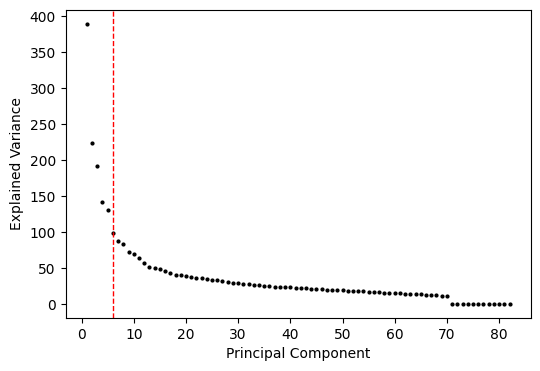

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'ok', markersize=2)
ax.axvline(6, linestyle="dashed", color="red", linewidth=1)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance");

3036.024691358023


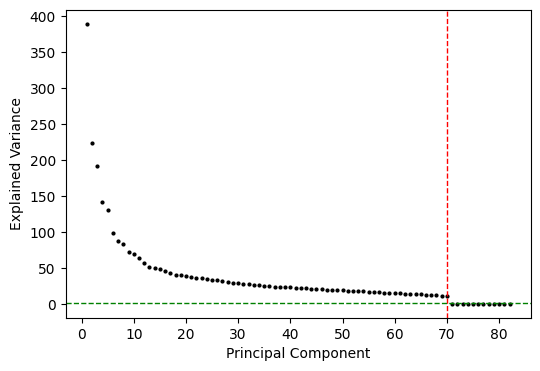

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(np.arange(1, len(pca.components_) + 1), pca.explained_variance_, 'ok', markersize=2)
ax.axvline(70, linestyle="dashed", color="red", linewidth=1)
ax.axhline(1, linestyle="dashed", color="green", linewidth=1)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance");
print(pca.explained_variance_.sum())

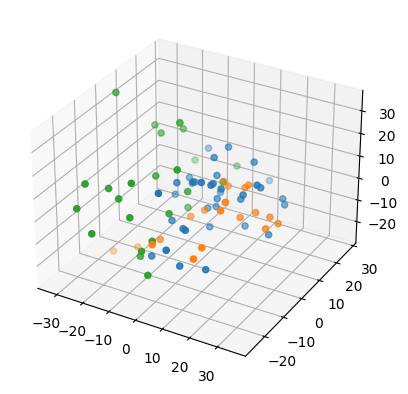

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for i in range(0,3):
    ax.scatter(principal_components_pca[labels==i, 1], principal_components_pca[labels==i, 2],principal_components_pca[labels==i, 3] )

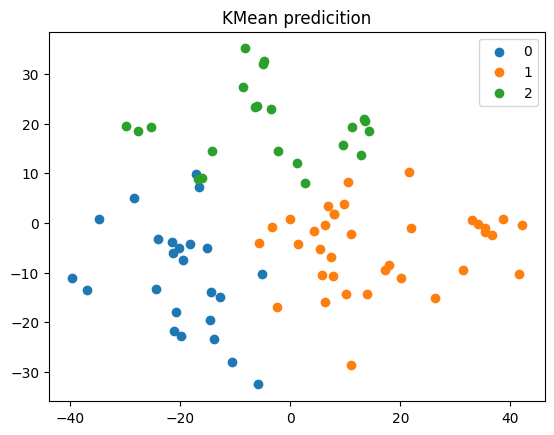

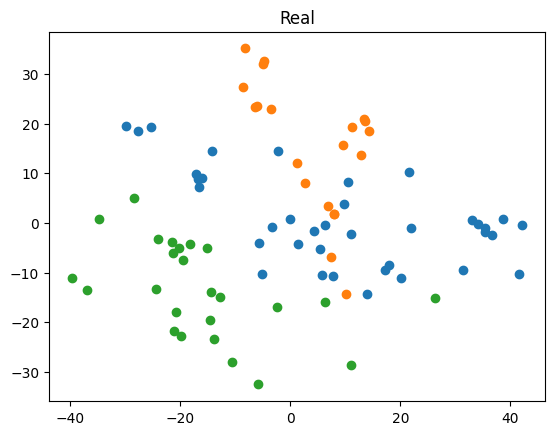

C:\Users\elinh\OneDrive\Skrivbord\Big Data\venvBigData\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


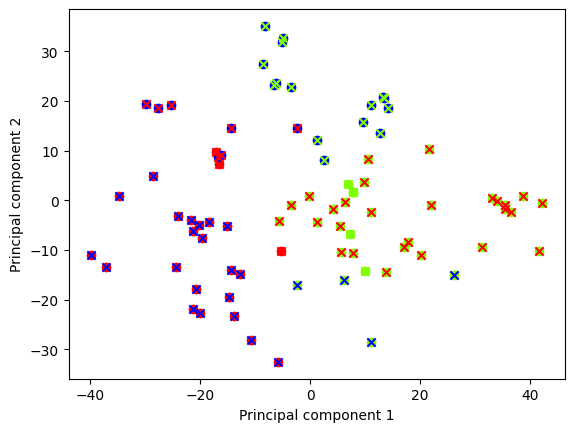

<Figure size 640x480 with 0 Axes>

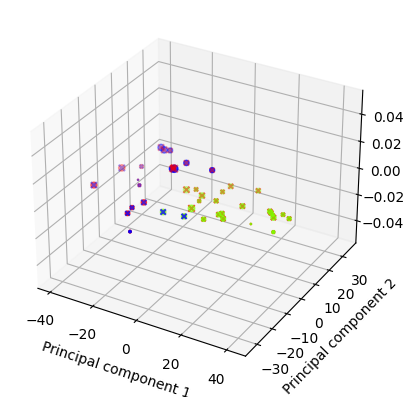

In [197]:
from sklearn.cluster import KMeans
plt.figure(1)

kmeans = KMeans(n_clusters = 3, n_init="auto", algorithm='lloyd').fit(principal_components_pca)
#print(kmeans.cluster_centers_)
#kmean_label = kmeans.predict(principal_components_pca)

#Getting unique labels
u_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in u_labels:
    #plt.scatter(principal_components_pca[kmean_label == i , 0] , principal_components_pca[kmean_label == i , 1] , label = i)
    plt.scatter(principal_components_pca[kmeans.labels_ == i , 0] , principal_components_pca[kmeans.labels_ == i , 1] , label = i)
    
plt.legend()
plt.title('KMean predicition')


plt.figure(2)
for i in u_labels:
    plt.scatter(principal_components_pca[labels == i , 0] , principal_components_pca[labels == i , 1] , label = i)

plt.title('Real')
plt.show()

plt.figure(3)
plot_true_vs_predict_2d(labels, kmeans.labels_)

plt.figure(4)
plot_true_vs_predict_3d(labels, kmeans.labels_)

In [350]:
def plot_true_vs_predict_2d(true_labels, predicted_labels, pca_component1=None, pca_component2=None):
    pca_component1 = 0 if pca_component1 is None else pca_component1
    pca_component2 = 1 if pca_component2 is None else pca_component2
    
    fig, (ax1, ax2) = plt.subplots(2)
    fig.set_size_inches(18.5, 10.5)
    
    colors1 = ['#000000', '#E69F00', '#56B4E9']
    colors2 = ['#009E73', '#D55E00', '#F0E442']
    plt.figure(3)
    
    for i in range(0,3):
        ax1.scatter(principal_components_pca[predicted_labels == i , pca_component1] , principal_components_pca[predicted_labels == i , pca_component2] , label = i, color=colors2[i])
        ax2.scatter(principal_components_pca[true_labels == i , pca_component1] , principal_components_pca[true_labels == i , pca_component2] , label = i, marker="8", color=colors1[i], zorder=5)
        
    ax1.set_xlabel('Principal component ' + str(pca_component1+1))
    ax2.set_ylabel('Principal component ' + str(pca_component2+1))
    ax2.set_xlabel('Principal component ' + str(pca_component1+1))
    ax1.set_ylabel('Principal component ' + str(pca_component2+1))
    ax1.set_title('Predicted')
    ax2.set_title('Real')

In [334]:
print(len(principal_components_pca[: , 0]))

82


In [773]:
import math
import pandas as pd

def plot_difference(true_labels, predicted_labels, pca_component1=None, pca_component2=None):
    pca_component1 = 0 if pca_component1 is None else pca_component1
    pca_component2 = 1 if pca_component2 is None else pca_component2

    fig, ax = plt.subplots(3)
    fig.set_size_inches(18.5, 10.5)
    
    custom_xlim = (-30, 30)
    custom_ylim = (-30, 30)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    
    colors1 = ['#f542b0', '#E69F00', '#56B4E9']
    colors2 = ['#009E73', '#D55E00', '#F0E442']
    nr_of_wrong = np.zeros(3)
    nr_of_missed = np.zeros(3)
    
    for pred in range(3):
        max_common = 0
        max_cluster = 0
        predicted_cluster = np.array([principal_components_pca[predicted_labels == pred , pca_component1], 
                             principal_components_pca[predicted_labels == pred , pca_component2]])


        for j in range(3):
            common = 0   
            true_cluster = np.array([principal_components_pca[true_labels == j , pca_component1], 
                            principal_components_pca[true_labels == j , pca_component2]])

            for i in range(predicted_cluster.shape[1]):
                for k in range(true_cluster.shape[1]):
                    if np.array_equal(true_cluster[0:2, k], predicted_cluster[0:2, i]):
                        common += 1

            if common > max_common:
                max_common = common
                max_cluster = j

        cluster = np.array([principal_components_pca[true_labels == max_cluster , pca_component1], 
                            principal_components_pca[true_labels == max_cluster , pca_component2]])

        wrong = []
        for i in range(predicted_cluster.shape[1]):
            col_pred = predicted_cluster[0:2, i]
            not_in = 0

            for k in range(cluster.shape[1]):
                col_true = cluster[0:2, k]
                if np.array_equal(col_pred, col_true):
                    not_in += 1

            if not_in < 1:
                wrong.append(col_pred)
             
        missed = []
        for i in range(cluster.shape[1]):
            col_pred = cluster[0:2, i]
            not_in = 0

            for k in range(predicted_cluster.shape[1]):
                col_true = predicted_cluster[0:2, k]
                if np.array_equal(col_pred, col_true):
                    not_in += 1

            if not_in < 1:
                missed.append(col_pred)
        
        nr_of_missed[pred] = len(missed)
        nr_of_wrong[pred] = len(wrong)
        if wrong:
            wrong = np.array(wrong)
            line1 = ax[pred].scatter(wrong[:,0] , wrong[:, 1], marker='x', color='black', zorder=10)

        line2 = ax[pred].scatter(principal_components_pca[predicted_labels == pred , pca_component1] , 
                        principal_components_pca[predicted_labels == pred , pca_component2] , label = i, color=colors1[pred])

        #for n in range(0,3):
        #    ax[pred].scatter(principal_components_pca[true_labels == n , pca_component1] , 
        #                principal_components_pca[true_labels == n , pca_component2] , label = i, marker="1", color=colors2[n], zorder=5)
        
        line3 = ax[pred].scatter(principal_components_pca[true_labels == max_cluster , pca_component1] , 
                        principal_components_pca[true_labels == max_cluster , pca_component2] , label = i, color=colors2[pred],
                         zorder = 5, marker="1")
        ax[pred].set_title('True datapoints, predicted datapoints and wrong datapoints')
        ax[pred].legend([line1, line2, line3], ['Wrong pred. cluster', 'All pred.', '"True" cluster'])
        
        
    fig, (ax5, ax6) = plt.subplots(2)
    fig.set_size_inches(18.5, 10.5)
    
    colors1 = ['#f542b0', '#E69F00', '#56B4E9']
    colors2 = ['#009E73', '#D55E00', '#F0E442']
    plt.figure(3)
    
    for i in range(0,3):
        ax5.scatter(principal_components_pca[predicted_labels == i , pca_component1] , principal_components_pca[predicted_labels == i , pca_component2] , label = i, color=colors2[i])
        ax6.scatter(principal_components_pca[true_labels == i , pca_component1] , principal_components_pca[true_labels == i , pca_component2] , label = i, marker="8", color=colors1[i], zorder=5)
        
    ax5.set_xlabel('Principal component ' + str(pca_component1+1))
    ax6.set_ylabel('Principal component ' + str(pca_component2+1))
    ax6.set_xlabel('Principal component ' + str(pca_component1+1))
    ax5.set_ylabel('Principal component ' + str(pca_component2+1))
    ax5.set_title('Predicted')
    ax6.set_title('Real')
    
    all_info = np.stack((nr_of_wrong, nr_of_missed), axis = 1)
    wrong_info = pd.DataFrame(all_info, columns = ["Number of wrong in each cluster", "Number of missed in each cluster"])#['Nr. of wrong: cluster 1','Nr. of wrong: cluster 2','Nr. of wrong: cluster 3'])
    print(wrong_info)
    

0.53194497235478
   Number of wrong in each cluster  Number of missed in each cluster
0                              5.0                              11.0
1                              8.0                               5.0
2                              3.0                               0.0


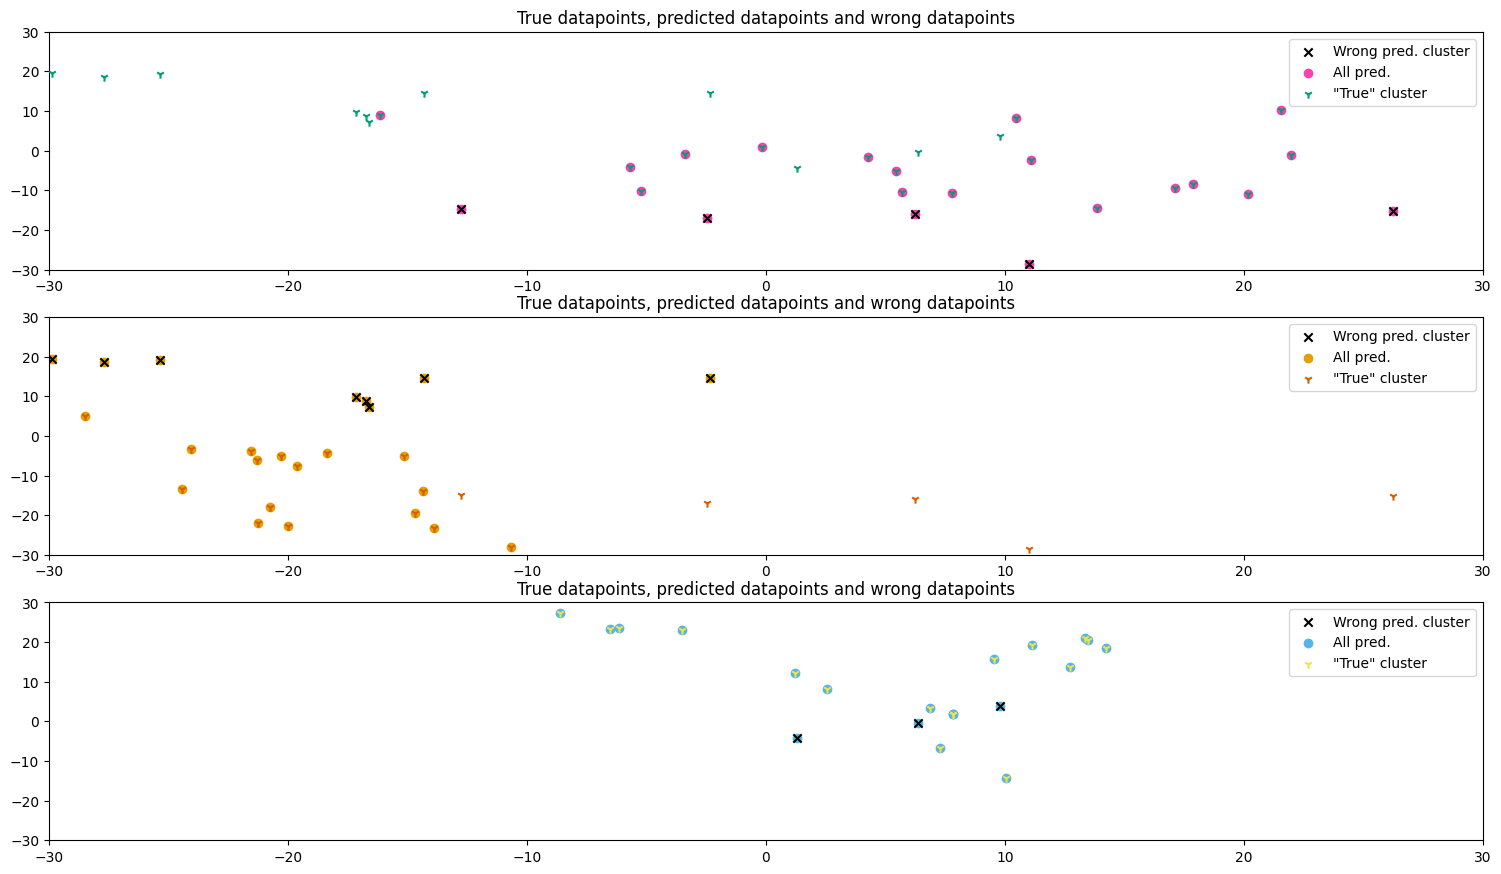

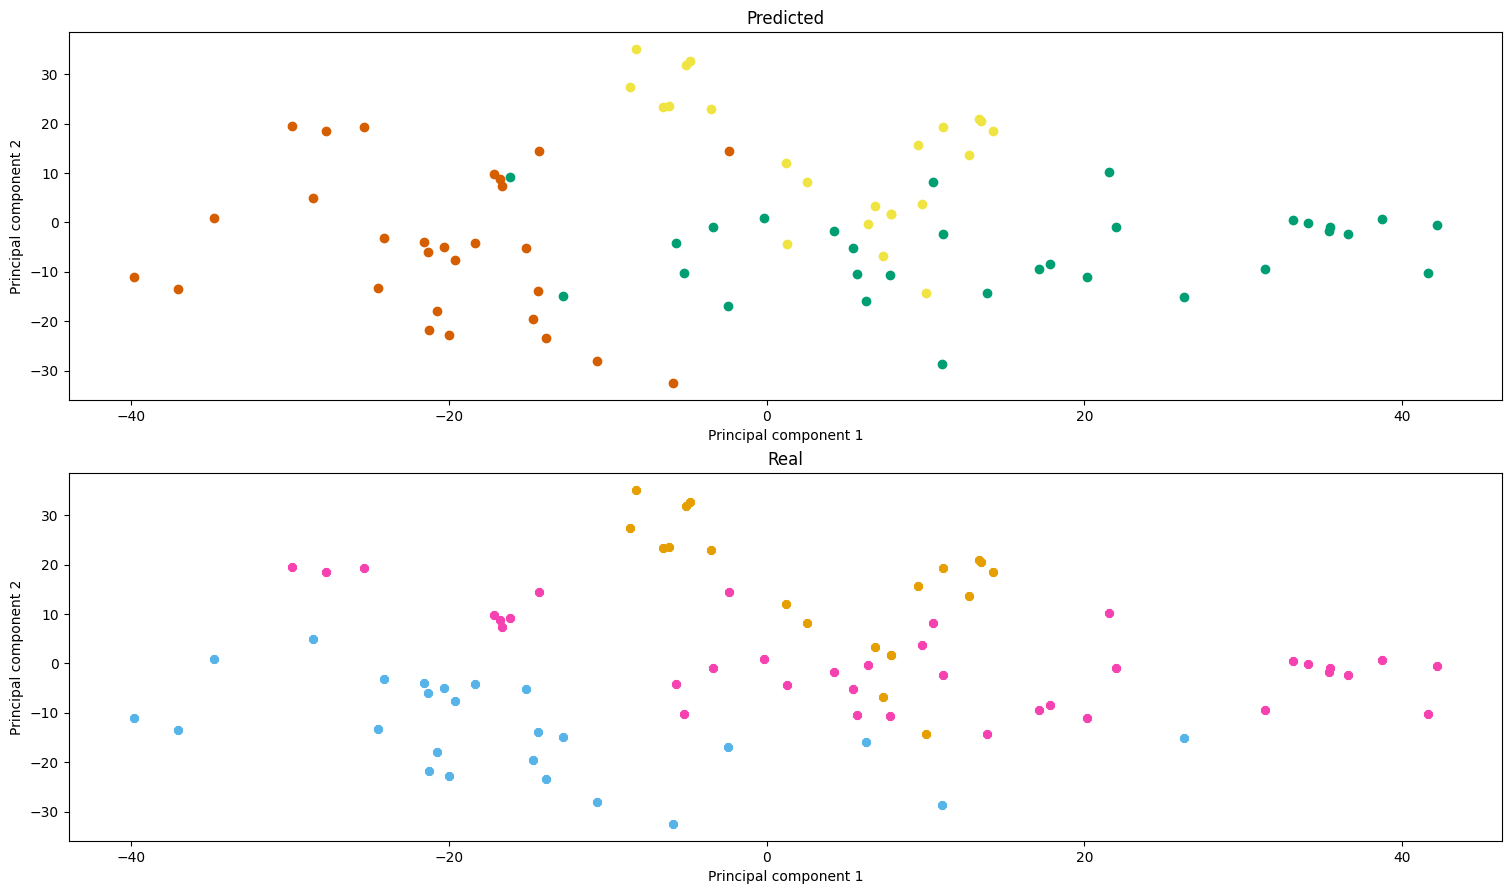

<Figure size 640x480 with 0 Axes>

In [772]:
agg_labels = hier_clust(3, principal_components_pca)

ARI_score = find_difference_in_classes(labels, agg_labels)
print(ARI_score)

plot_difference(labels, agg_labels)

In [328]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

def find_difference_in_classes(true_labels, predicted_labels, pca_component1=None, pca_component2=None):
    pca_component1 = 0 if pca_component1 is None else pca_component1
    pca_component2 = 1 if pca_component2 is None else pca_component2
        
    ARI = adjusted_mutual_info_score(true_labels, predicted_labels)
    return ARI

In [298]:
def plot_true_vs_predict_3d(true_labels, predicted_labels, pca_component1=None, pca_component2=None, pca_component3 = None):
    pca_component1 = 0 if pca_component1 is None else pca_component1
    pca_component2 = 1 if pca_component2 is None else pca_component2
    pca_component3 = 2 if pca_component3 is None else pca_component3
    
    colors = ['red', '#7FFF00', 'blue']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection ='3d')
    
    
    for i in u_labels:
        plt.scatter(principal_components_pca[predicted_labels == i , pca_component1] , principal_components_pca[predicted_labels == i , pca_component2], principal_components_pca[predicted_labels == i , pca_component3] , label = i, color=colors[i])
        plt.scatter(principal_components_pca[true_labels == i , pca_component1] , principal_components_pca[true_labels == i , pca_component2], principal_components_pca[true_labels == i , pca_component3], label = i, marker="8", color=colors[i], zorder=5)
        
    plt.title('Plot of the real-label and kMean-label')
   

In [703]:
from sklearn.cluster import AgglomerativeClustering

def hier_clust(nr_of_clusters, data):
    agg_clust = AgglomerativeClustering(n_clusters = nr_of_clusters, metric = 'euclidean', linkage = 'ward')
    agg_clust.fit(data)
    
    return agg_clust.labels_

0.53194497235478
[17.14291949 -9.42872305]
[9.80197866 3.78575873]
[-27.7022986   18.57772298]
[10.47825531  8.29273354]
[-16.12933672   9.1151053 ]
[31.33654352 -9.42756721]
[-3.37206391 -0.88845729]
[17.85499069 -8.40236066]
[21.5577923  10.26893646]
[-25.34071649  19.24924468]
[35.43122206 -0.95423907]
[34.07086477 -0.161707  ]
[ 1.31680199 -4.31787929]
[36.56242038 -2.37727831]
[38.7170685   0.79637508]
[ 20.18472338 -10.9944576 ]
[-0.16900217  0.8431928 ]
[35.36997399 -1.71419707]
[ 6.3677685  -0.34615956]
[  7.79538907 -10.66397682]
[-2.33037095 14.55390614]
[-16.61409336   7.28175436]
[-29.8578213   19.50114283]
[ 5.44339569 -5.16507486]
[33.09566941  0.54458941]
[ -5.21060183 -10.27608865]
[11.09478229 -2.29384707]
[-16.74534108   8.76158423]
[ 13.86420449 -14.38043244]
[21.98568738 -1.00342893]
[ 41.63415922 -10.23127808]


IndexError: list index out of range

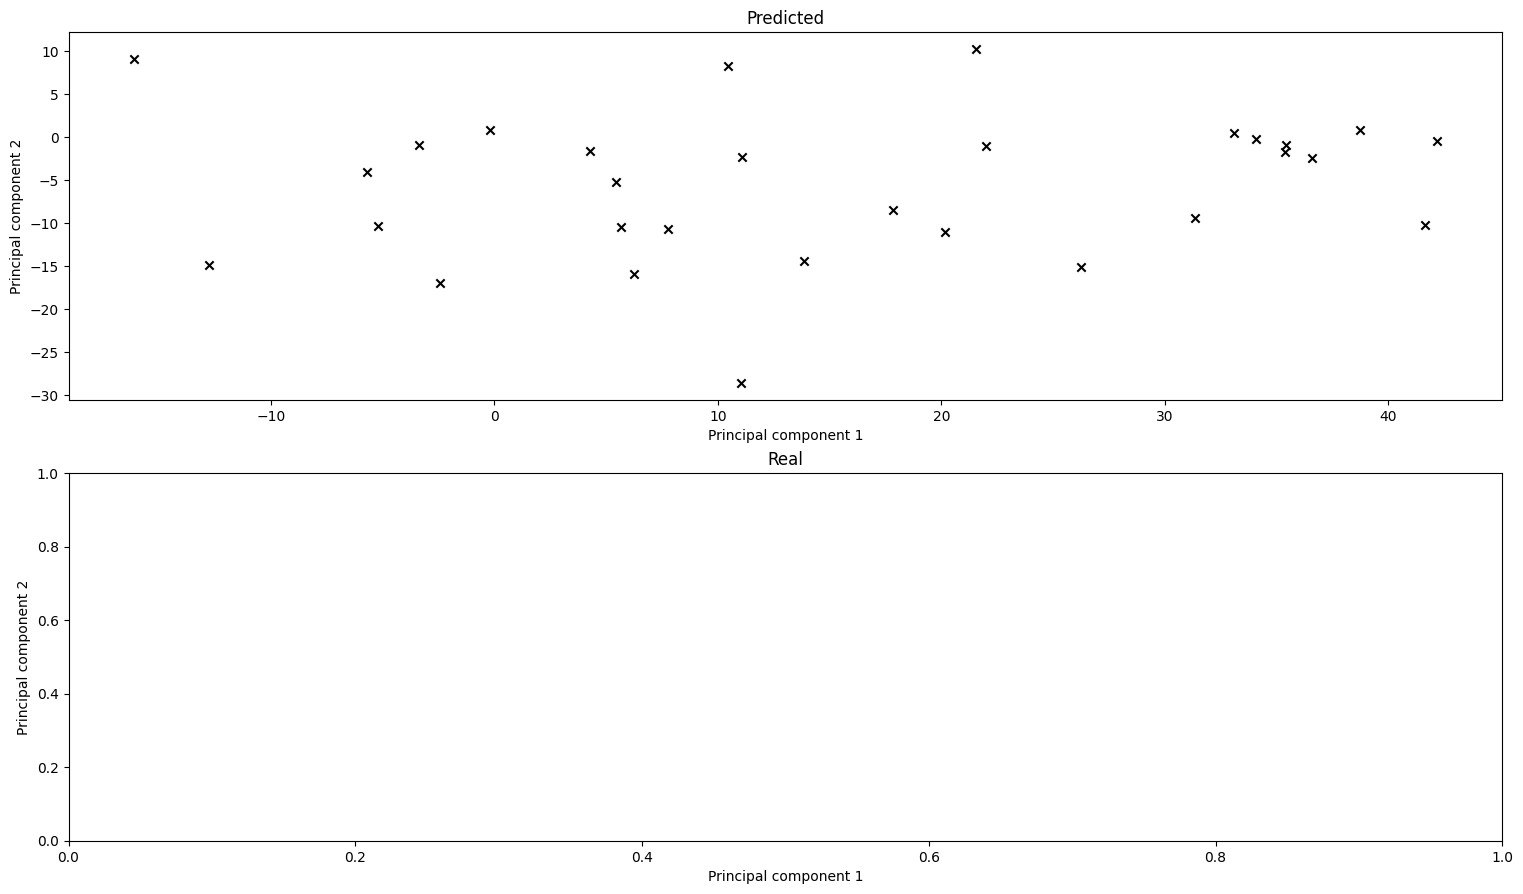

<Figure size 640x480 with 0 Axes>

C:\Users\elinh\OneDrive\Skrivbord\Big Data\venvBigData\lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


0
2
1


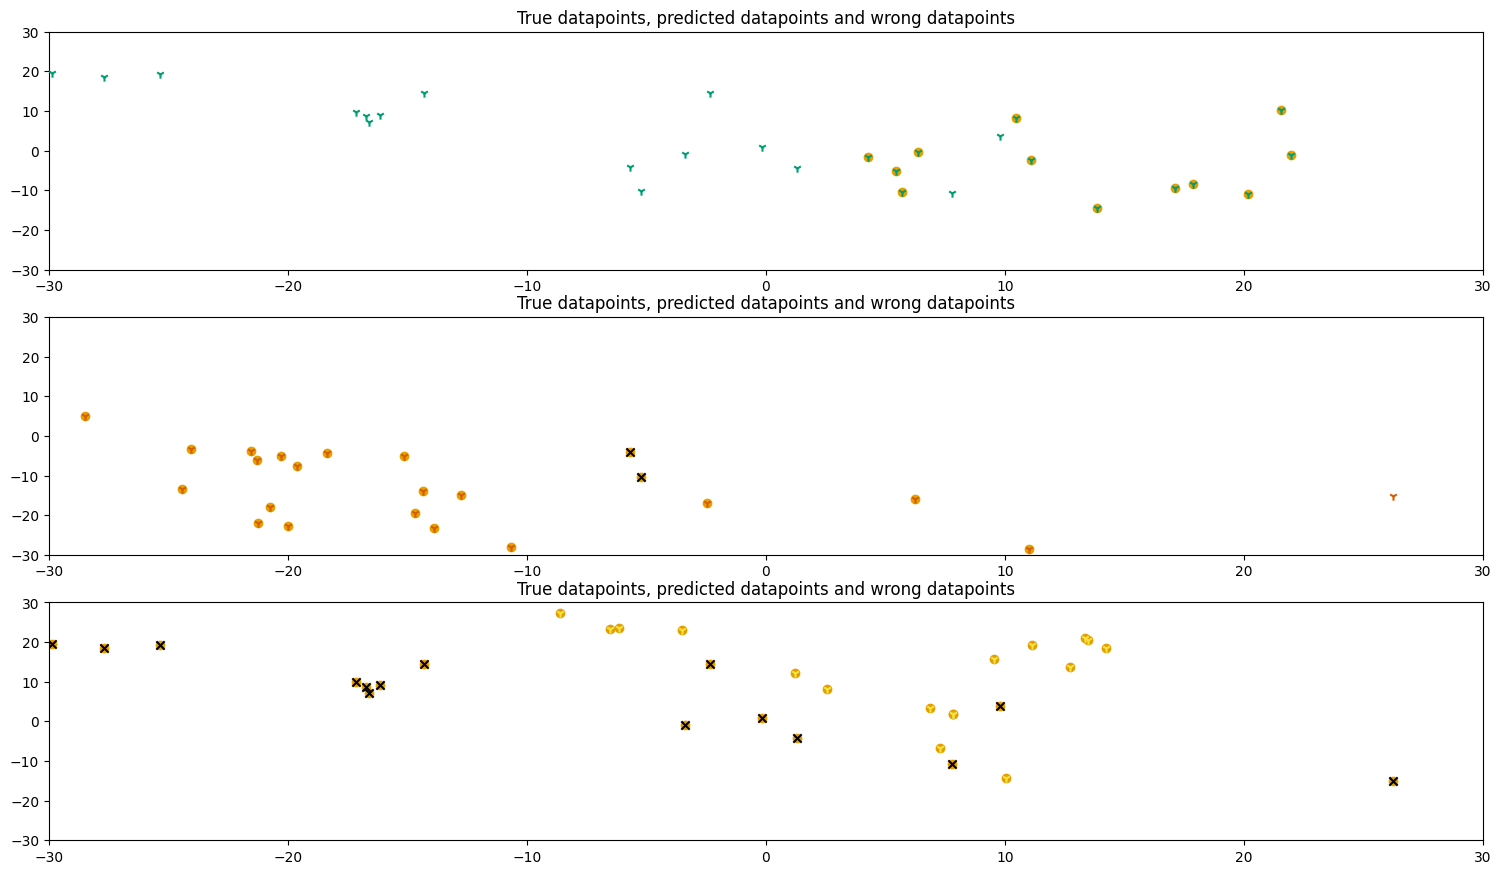

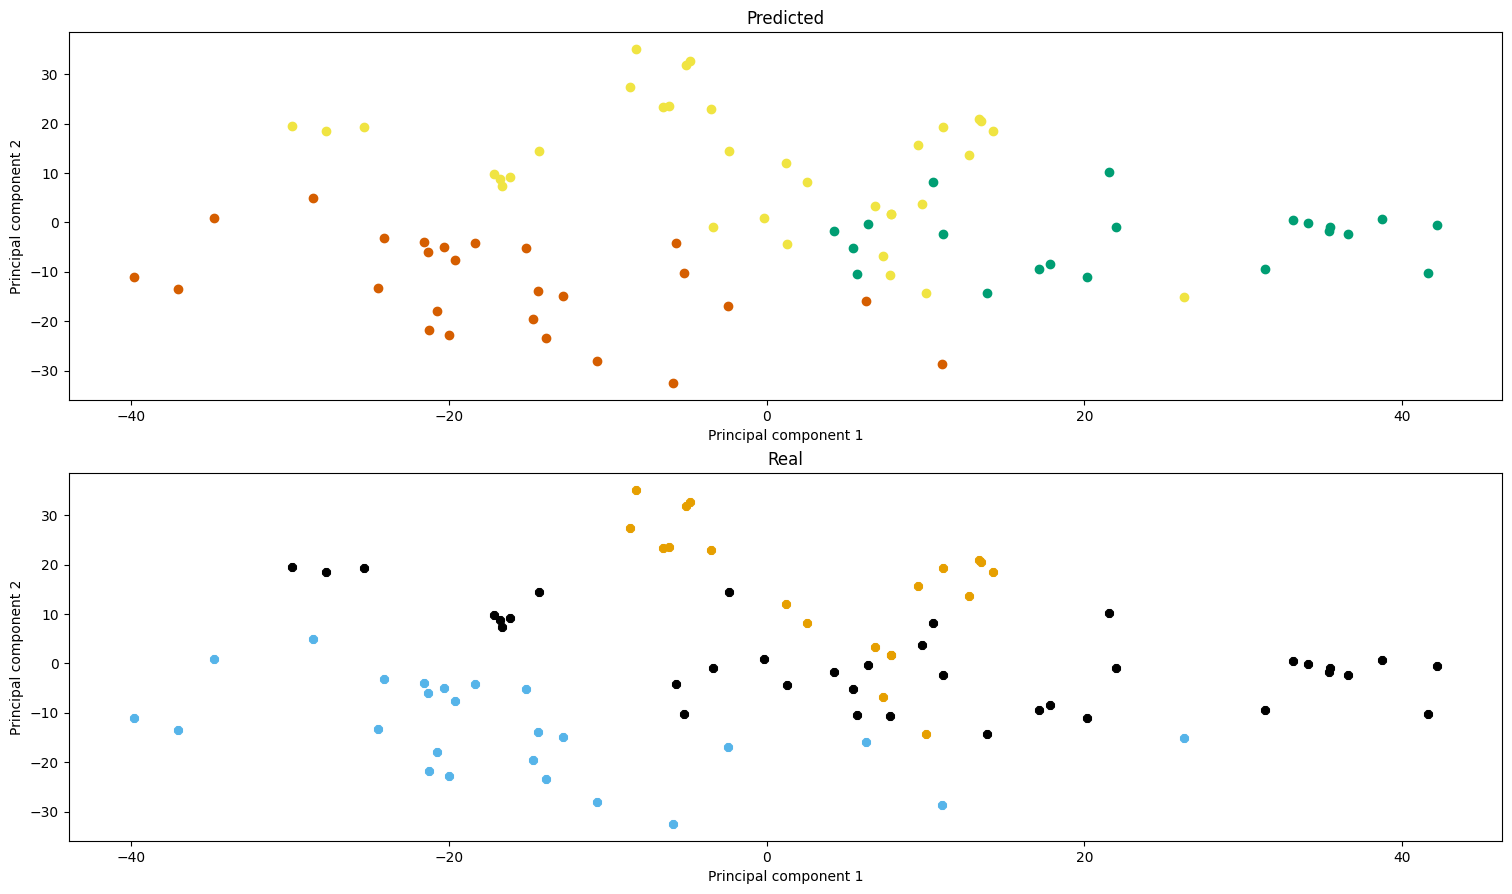

<Figure size 640x480 with 0 Axes>

In [716]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3, eigen_solver='lobpcg', n_init=10, gamma=1.0, affinity='nearest_neighbors',
                        n_neighbors=10, assign_labels='cluster_qr')

sc_labels = sc.fit_predict(principal_components_pca)

plot_difference(labels, sc_labels)